## Loading dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [2]:
# loading data
df = pd.read_csv('data/appendix_cleaned.csv', parse_dates=['LaunchDate'])
df.head()

,Institution,CourseNumber,LaunchDate,CourseTitle,Instructors,CourseSubject,Year,Participants,PercentAudited,PercentCertified,PercentCertifiedAudited,PercentPlayedVideo,PercentPosted,PercentGradeHigherThanZero,TotalCourseHours,MedianHoursCertification,MedianAge,PercentFemale,PercentBachelorOrHigher
0,MITx,6.002x,2012-09-05,Circuits and Electronics,Khurram Afridi,STEM,1,36105,15.04,8.32,54.98,83.20,8.17,28.97,418.94,64.45,26.0,11.72,60.68
1,MITx,6.00x,2012-09-26,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",CS,1,62709,14.27,9.22,64.05,89.14,14.38,39.50,884.04,78.53,28.0,16.50,63.04
2,MITx,3.091x,2012-10-09,Introduction to Solid State Chemistry,Michael Cima,STEM,1,16663,17.13,12.49,72.85,87.49,14.42,34.89,227.55,61.28,27.0,29.68,58.76
3,HarvardX,PH207x,2012-10-15,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano",GHSS,1,52521,20.44,9.64,47.12,77.45,15.98,32.52,804.41,76.10,32.0,43.22,88.33
4,MITx,6.00x,2013-02-04,Introduction to Computer Science and Programming,Larry Rudolph,CS,1,65380,9.90,5.07,51.17,82.43,10.30,28.90,639.40,84.14,27.0,16.01,60.90


In [ ]:
df.groupby('CourseSubject')['CourseTitle']

In [3]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 19 columns):
Institution                   282 non-null object
CourseNumber                  282 non-null object
LaunchDate                    282 non-null datetime64[ns]
CourseTitle                   282 non-null object
Instructors                   281 non-null object
CourseSubject                 282 non-null object
Year                          282 non-null int64
Participants                  282 non-null int64
PercentAudited                282 non-null float64
PercentCertified              282 non-null float64
PercentCertifiedAudited       282 non-null float64
PercentPlayedVideo            282 non-null float64
PercentPosted                 282 non-null float64
PercentGradeHigherThanZero    282 non-null float64
TotalCourseHours              282 non-null float64
MedianHoursCertification      282 non-null float64
MedianAge                     282 non-null float64
PercentFemale                 

In [4]:
# statistical description
df.describe()

,Year,Participants,PercentAudited,PercentCertified,PercentCertifiedAudited,PercentPlayedVideo,PercentPosted,PercentGradeHigherThanZero,TotalCourseHours,MedianHoursCertification,MedianAge,PercentFemale,PercentBachelorOrHigher
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,3.195035,14933.691489,25.154504,7.963369,32.072270,64.589043,9.410461,21.569858,95.709149,44.863865,29.255319,33.022270,72.153369
std,0.889386,27631.454243,15.915692,6.968177,19.477421,11.901607,7.508248,13.267177,159.208726,43.771098,3.817042,15.813436,10.167046
min,1.000000,322.000000,2.630000,0.120000,0.710000,10.960000,0.000000,0.000000,0.110000,0.000000,22.000000,7.460000,44.950000
25%,3.000000,3763.250000,14.277500,2.780000,14.935000,58.950000,4.115000,11.727500,13.475000,12.485000,26.000000,18.367500,64.590000
50%,3.000000,7901.500000,20.440000,6.190000,31.650000,66.265000,7.315000,19.805000,37.710000,27.290000,29.000000,33.395000,73.325000
75%,4.000000,17541.500000,34.002500,11.062500,47.842500,72.522500,14.107500,31.180000,97.225000,67.472500,31.000000,45.927500,79.387500
max,4.000000,301082.000000,83.960000,33.980000,77.090000,89.140000,35.280000,52.350000,895.010000,251.820000,40.000000,74.760000,92.080000


In [5]:
df.columns

Index(['Institution', 'CourseNumber', 'LaunchDate', 'CourseTitle',
       'Instructors', 'CourseSubject', 'Year', 'Participants',
       'PercentAudited', 'PercentCertified', 'PercentCertifiedAudited',
       'PercentPlayedVideo', 'PercentPosted', 'PercentGradeHigherThanZero',
       'TotalCourseHours', 'MedianHoursCertification', 'MedianAge',
       'PercentFemale', 'PercentBachelorOrHigher'],
      dtype='object')

## Univariate Exploration

In this part, we conduct univariate exploration. The dependent variables are 'PercentCertified' and 'PercentCertifiedAudited', the others will server as the independent variables. For better exploration, we divide the independent variables into 3 categories below:

- **Course related variables:** Including 'Institution', 'CourseNumber', 'LaunchDate', 'CourseTitle','Instructors', 'CourseSubject', 'Year'
- **Learners Demographic variables:** Including 'MedianAge', 'PercentFemale', 'PercentBachelorOrHigher'
- **Learners activity variables:** Including 'Participants','PercentAudited', 'PercentPlayedVideo', 'PercentPosted', 'PercentGradeGreaterThanZero','TotalCourseHours', 'MedianHoursCertification'

### Dependent Variables

The dependent variable PercentCertified is actually the certification rate for participants. 

The dependent variable PercentCertifiedAudited is the certification rate for audited.

#### PercentCertified

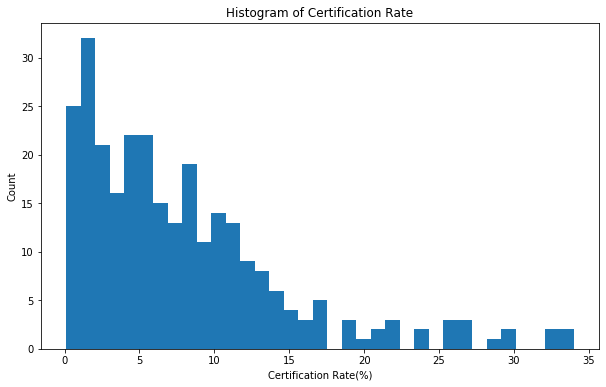

In [6]:
# histogram of PercentCertified
plt.figure(figsize=(10, 6))
plt.hist(df['PercentCertified'], bins=35)
plt.title('Histogram of Certification Rate')
plt.xlabel('Certification Rate(%)')
plt.ylabel('Count');

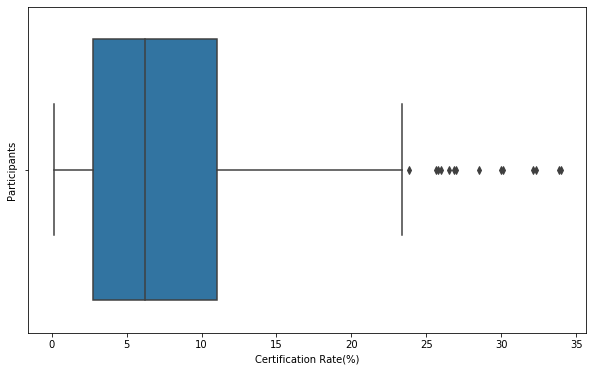

In [7]:
# Boxplot of Certification Rate for Participants
plt.figure(figsize=(10, 6))
sb.boxplot(df['PercentCertified'])
#plt.title('Boxplot of Certification Rate for Partifipants')
plt.xlabel('Certification Rate(%)')
plt.ylabel('Participants')
plt.savefig('figures/Figure 1.pdf');

In [8]:
df['PercentCertified'].describe()

count    282.000000
mean       7.963369
std        6.968177
min        0.120000
25%        2.780000
50%        6.190000
75%       11.062500
max       33.980000
Name: PercentCertified, dtype: float64

We can see that the histogram of PercentCertified is right skewed. Most courses have a certification rate of less than 10%. There are also a few courses with a certification rate of more than 30%.

#### PercentCertifiedAudited

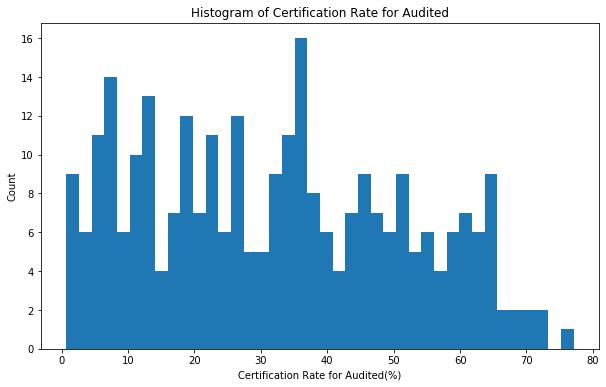

In [9]:
# histogram of PercentCertifiedAudited
plt.figure(figsize=(10, 6))
plt.hist(df['PercentCertifiedAudited'], bins=40)
plt.title('Histogram of Certification Rate for Audited')
plt.xlabel('Certification Rate for Audited(%)')
plt.ylabel('Count');

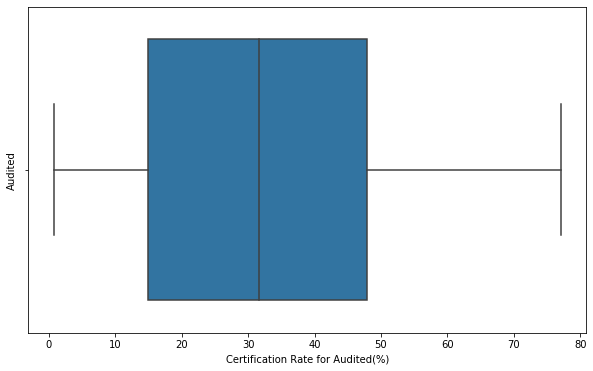

In [10]:
# Boxplot of Certification Rate for Audited
plt.figure(figsize=(10, 6))
sb.boxplot(df['PercentCertifiedAudited'])
#plt.title('Boxplot of Certification Rate for Audited')
plt.xlabel('Certification Rate for Audited(%)')
plt.ylabel('Audited')
plt.savefig('figures/Figure 2.pdf');

In [11]:
df['PercentCertifiedAudited'].describe()

count    282.000000
mean      32.072270
std       19.477421
min        0.710000
25%       14.935000
50%       31.650000
75%       47.842500
max       77.090000
Name: PercentCertifiedAudited, dtype: float64

The certification rates for audited is more evenly distributed. With a mean of 32 and range of 76.

Are the certification rates of audited significantly different from the certification rates of the intended which we defined in the year 1 dataset? We will conduct a t test.

In [12]:
certification_rate_intended = [25.42, 100.0, 43.57, 28.73, 25.86, 41.66, 22.3, 36.27, 27.89, 31.88, 27.57, 18.7, 
                               12.94, 26.2, 20.7, 28.65]

In [13]:
# independent t test
t, p = stats.ttest_ind(certification_rate_intended, df.PercentCertifiedAudited)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

The p value is 0.9484631427130592

p is relatively large, there is no significant difference between the two means


In [14]:
# z test
z, p = ztest(certification_rate_intended, df.PercentCertifiedAudited)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

The p value is 0.9484194753333015

p is relatively large, there is no significant difference between the two means


We will use the certification rate of the audited as a proxy of the certification rate of intended. 

Significent test between certification rate of participants and audited: 

In [15]:
# independent t test
t, p = stats.ttest_ind(df.PercentCertified, df.PercentCertifiedAudited)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

The p value is 1.98247506736508e-65

p is very small, there is a significant difference between the two means


In [16]:
# z test
z, p = ztest(df.PercentCertified, df.PercentCertifiedAudited)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

The p value is 2.7208567432590757e-85

p is very small, there is a significant difference between the two means


Significent test between certification rate of participants and intended:

In [17]:
# independent t test
t, p = stats.ttest_ind(df.PercentCertified, certification_rate_intended)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

The p value is 2.3804903329042682e-26

p is very small, there is a significant difference between the two means


In [18]:
# z test
z, p = ztest(df.PercentCertified, certification_rate_intended)
print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no significant difference between the two means')

The p value is 8.993174511422723e-32

p is very small, there is a significant difference between the two means


### Course related variables: 
In this part we explore the Course related variables including 'Institution', 'CourseSubject', 'Year'

#### Institution

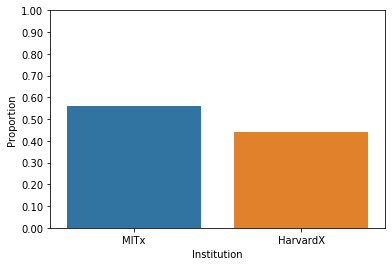

In [19]:
# bar chart of Institution
sb.countplot(data=df, x='Institution')
n_records = df.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.2f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names)
plt.ylabel('Proportion');

MITx has a little more cources than HarvardX.

#### CourseSubject

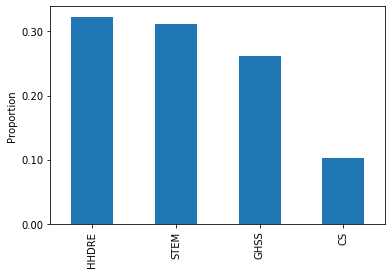

In [20]:
# bar chart of CourseSubject
n_records = df.shape[0]
tick_props = np.arange(0, 1+0.1, 0.1)
tick_names = ['{:.2f}'.format(x) for x in tick_props]
plt.yticks(tick_props*n_records, tick_names)
plt.ylabel('Proportion')
df['CourseSubject'].value_counts().plot.bar();

More courses are in HHDRE and STEM categories.

#### Year

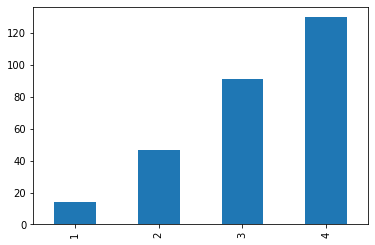

In [21]:
# bar chart of year
df['Year'].value_counts().sort_values().plot.bar();

The number of courses are increasing stablely over the years

### Learners Demographic variables

Next we will explore the Learners Demographic variables including 'MedianAge', 'PercentFemale', 'PercentBachelorOrHigher'

#### MedianAge

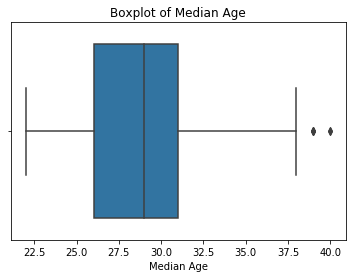

In [22]:
# boxplot of MedianAge
sb.boxplot(df['MedianAge'])
plt.title('Boxplot of Median Age')
plt.xlabel('Median Age');

In [23]:
# descriptive statistics
df['MedianAge'].describe()

count    282.000000
mean      29.255319
std        3.817042
min       22.000000
25%       26.000000
50%       29.000000
75%       31.000000
max       40.000000
Name: MedianAge, dtype: float64

#### PercentFemale

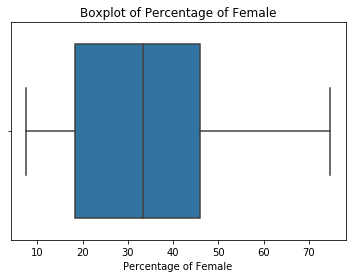

In [24]:
# boxplot of PercentFemale
sb.boxplot(df['PercentFemale'])
plt.title('Boxplot of Percentage of Female')
plt.xlabel('Percentage of Female');

In [25]:
# descriptive statistics
df['PercentFemale'].describe()

count    282.000000
mean      33.022270
std       15.813436
min        7.460000
25%       18.367500
50%       33.395000
75%       45.927500
max       74.760000
Name: PercentFemale, dtype: float64

#### PercentBachelorOrHigher

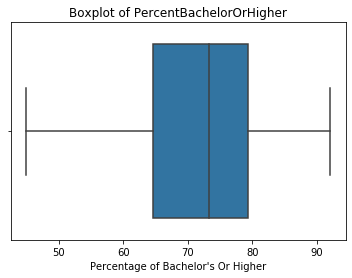

In [26]:
# boxplot of PercentBachelorOrHigher
sb.boxplot(df['PercentBachelorOrHigher'])
plt.title('Boxplot of PercentBachelorOrHigher')
plt.xlabel('Percentage of Bachelor\'s Or Higher');

In [27]:
# descriptive statistics
df['PercentBachelorOrHigher'].describe()

count    282.000000
mean      72.153369
std       10.167046
min       44.950000
25%       64.590000
50%       73.325000
75%       79.387500
max       92.080000
Name: PercentBachelorOrHigher, dtype: float64

### Learners activity variables

In this part, we explore the learners activity variables including 'Participants','PercentAudited', 'PercentPlayedVideo', 'PercentPosted', 'PercentGradeGreaterThanZero', 'TotalCourseHours', 'MedianHoursCertification'

#### Participants

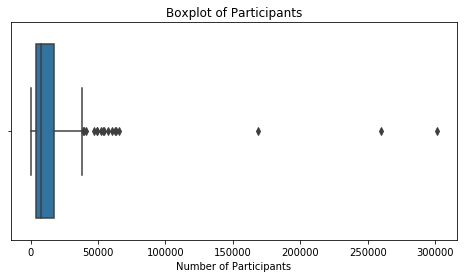

In [28]:
# boxplot of Participants
plt.figure(figsize=(8, 4))
sb.boxplot(df['Participants'])
plt.title('Boxplot of Participants')
plt.xlabel('Number of Participants');

In [29]:
# descriptive statistics
df['Participants'].describe()

count       282.000000
mean      14933.691489
std       27631.454243
min         322.000000
25%        3763.250000
50%        7901.500000
75%       17541.500000
max      301082.000000
Name: Participants, dtype: float64

Most courses have less than 50,000 panticipants. Some courses have as mamy as over 300,000 participants.

#### PercentAudited

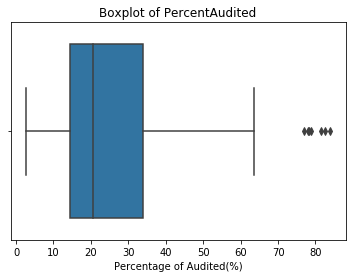

In [30]:
# boxplot of PercentAudited
sb.boxplot(df['PercentAudited'])
plt.title('Boxplot of PercentAudited')
plt.xlabel('Percentage of Audited(%)');

In [31]:
# descriptive statistics
df['PercentAudited'].describe()

count    282.000000
mean      25.154504
std       15.915692
min        2.630000
25%       14.277500
50%       20.440000
75%       34.002500
max       83.960000
Name: PercentAudited, dtype: float64

The percentage of audited vary a lot. With a range of 81 and mean of 25.

#### PercentPlayedVideo

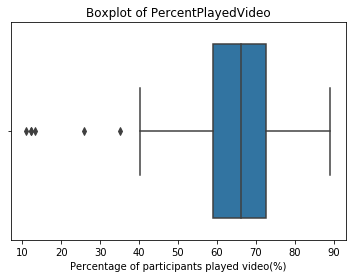

In [32]:
# boxplot of PercentPlayedVideo
sb.boxplot(df['PercentPlayedVideo'])
plt.title('Boxplot of PercentPlayedVideo')
plt.xlabel('Percentage of participants played video(%)');

In [33]:
# descriptive statistics
df['PercentPlayedVideo'].describe()

count    282.000000
mean      64.589043
std       11.901607
min       10.960000
25%       58.950000
50%       66.265000
75%       72.522500
max       89.140000
Name: PercentPlayedVideo, dtype: float64

Most courses have a percentage of played video range from 40 to 89. However, there are also some courses with percentage of played video as less as 10.

#### PercentPosted

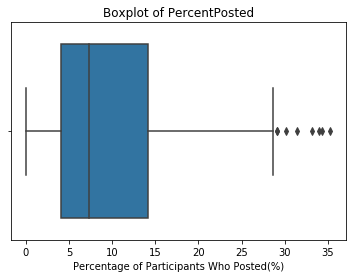

In [34]:
# boxplot of PercentPosted
sb.boxplot(df['PercentPosted'])
plt.title('Boxplot of PercentPosted')
plt.xlabel('Percentage of Participants Who Posted(%)');

In [35]:
# descriptive statistics
df['PercentPosted'].describe()

count    282.000000
mean       9.410461
std        7.508248
min        0.000000
25%        4.115000
50%        7.315000
75%       14.107500
max       35.280000
Name: PercentPosted, dtype: float64

#### PercentGradeHigherThanZero

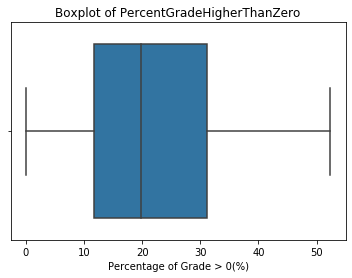

In [36]:
# boxplot of PercentGradeHigherThanZero
sb.boxplot(df['PercentGradeHigherThanZero'])
plt.title('Boxplot of PercentGradeHigherThanZero')
plt.xlabel('Percentage of Grade > 0(%)');

In [37]:
# descriptive statistics
df['PercentGradeHigherThanZero'].describe()

count    282.000000
mean      21.569858
std       13.267177
min        0.000000
25%       11.727500
50%       19.805000
75%       31.180000
max       52.350000
Name: PercentGradeHigherThanZero, dtype: float64

#### TotalCourseHours

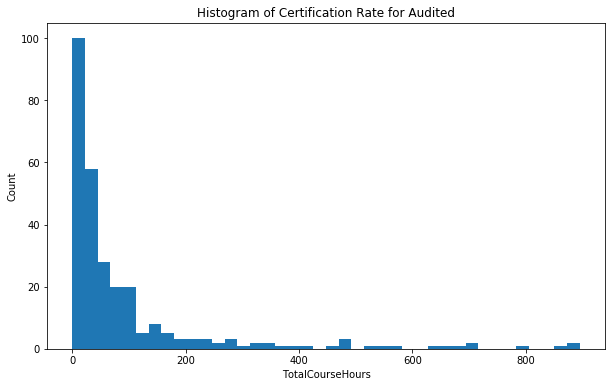

In [38]:
# histogram of TotalCourseHours
plt.figure(figsize=(10, 6))
plt.hist(df['TotalCourseHours'], bins=40)
plt.title('Histogram of Certification Rate for Audited')
plt.xlabel('TotalCourseHours')
plt.ylabel('Count');

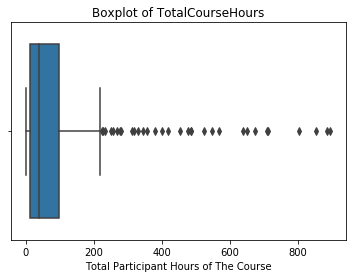

In [39]:
# boxplot of TotalCourseHours
sb.boxplot(df['TotalCourseHours'])
plt.title('Boxplot of TotalCourseHours')
plt.xlabel('Total Participant Hours of The Course');

In [40]:
# descriptive statistics
df['TotalCourseHours'].describe()

count    282.000000
mean      95.709149
std      159.208726
min        0.110000
25%       13.475000
50%       37.710000
75%       97.225000
max      895.010000
Name: TotalCourseHours, dtype: float64

The Total Course Hours vary a lot. Most of the courses have a Total Course Hours of less than 100 hours. However, there are some coueses have a Total Course Hours of almost 900 hours.

#### MedianHoursCertification

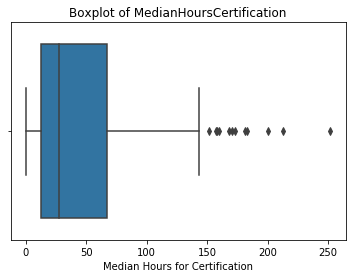

In [41]:
# boxplot of MedianHoursCertification
sb.boxplot(df['MedianHoursCertification'])
plt.title('Boxplot of MedianHoursCertification')
plt.xlabel('Median Hours for Certification');

In [42]:
# descriptive statistics
df['MedianHoursCertification'].describe()

count    282.000000
mean      44.863865
std       43.771098
min        0.000000
25%       12.485000
50%       27.290000
75%       67.472500
max      251.820000
Name: MedianHoursCertification, dtype: float64

## Bivariate Exploration

In this part, we conduct analysis on two variables to explore the relationship between the dependent variable and independent variables. For the dependent variable, we will focus on PercentCertifiedAudited.

### Course related variables

#### Institution vs. Certification

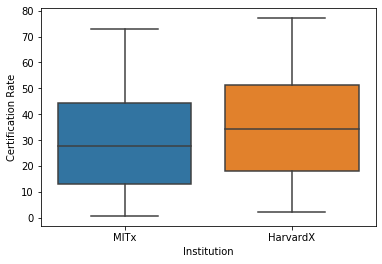

In [43]:
# boxplot of Instituton vs. Certification
sb.boxplot(x='Institution', y='PercentCertifiedAudited', data=df)
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 3.pdf');

The mean certification rate of HarvardX courses is a little higher than MITx courses. 

In [69]:
# we will use a z test to check how significant is the difference between mean certification rate of HarvardX and MITx

z, p = ztest(df[df.Institution=='HarvardX'].PercentCertifiedAudited, df[df.Institution=='MITx'].PercentCertifiedAudited)

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the two means')
else:
    print('p is relatively large, there is no sufficient evidence to show the significant difference between the two means')


The p value is 0.03715979651963099

p is very small, there is a significant difference between the two means


#### Course Subject vs.  Certification

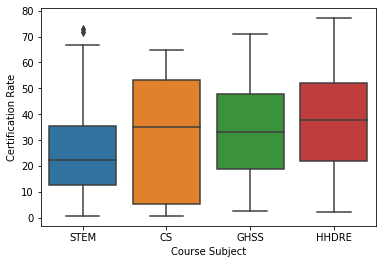

In [45]:
# boxplot of CourseSubject vs. certification rate
sb.boxplot(x='CourseSubject', y='PercentCertifiedAudited', data=df)
plt.ylabel('Certification Rate')
plt.xlabel('Course Subject')
plt.savefig('figures/Figure 4.pdf');

STEM has a relatively lower certification rate.

In [46]:
# ANOVA test
stem_certi = df[df.CourseSubject=='STEM'].PercentCertifiedAudited
cs_certi = df[df.CourseSubject=='CS'].PercentCertifiedAudited
ghss_certi = df[df.CourseSubject=='GHSS'].PercentCertifiedAudited
hhdre_certi = df[df.CourseSubject=='HHDRE'].PercentCertifiedAudited
f, p = stats.f_oneway(stem_certi, cs_certi, ghss_certi, hhdre_certi)

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the means of the groups')
else:
    print('p is relatively large, there is no sufficient evidence to show the significant difference between means of the three groups')
    

The p value is 0.0005402887727497603

p is very small, there is a significant difference between the means of the groups


#### Year vs. Certification

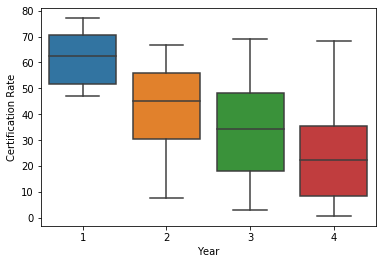

In [47]:
sb.boxplot(x='Year', y='PercentCertifiedAudited', data=df)
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 5.pdf');

The certification rate is decreasing over the years.

In [48]:
# ANOVA test
year1_certi = df[df.Year==1].PercentCertifiedAudited
year2_certi = df[df.Year==2].PercentCertifiedAudited
year3_certi = df[df.Year==3].PercentCertifiedAudited
year4_certi = df[df.Year==4].PercentCertifiedAudited
f, p = stats.f_oneway(year1_certi, year2_certi, year3_certi, year4_certi)

print('The p value is {}\n'.format(p))
if p < 0.05:
    print('p is very small, there is a significant difference between the means of the groups')
else:
    print('p is relatively large, there is no sufficient evidence to show the significant difference between means of the three groups')
    

The p value is 2.9242173208766897e-16

p is very small, there is a significant difference between the means of the groups


### Learners Demographic variables

#### Age vs. Certification

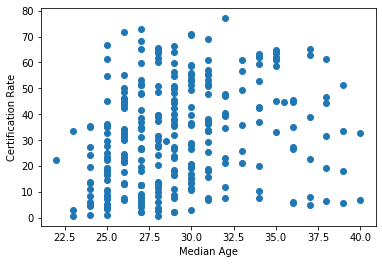

In [49]:
# scatter plot of median age vs. certification rate
plt.scatter(x='MedianAge', y='PercentCertifiedAudited',data=df)
#plt.title('Sactter Plot as Age vs. Certification')
plt.xlabel('Median Age')
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 6.pdf');

In [50]:
# Pearson's correlation coefficient
np.corrcoef(df['MedianAge'], df['PercentCertifiedAudited'])

array([[1.        , 0.21326241],
       [0.21326241, 1.        ]])

There is a weak positive correlation

#### Gender vs. Certification

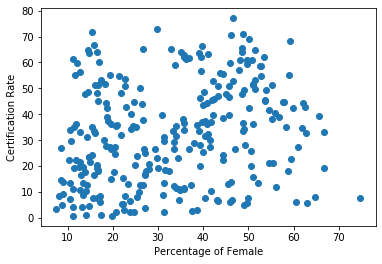

In [51]:
plt.scatter(x='PercentFemale', y='PercentCertifiedAudited',data=df)
plt.xlabel('Percentage of Female')
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 7.pdf');

In [52]:
# Pearson's correlation coefficient
np.corrcoef(df['PercentFemale'], df['PercentCertifiedAudited'])

array([[1.        , 0.24060363],
       [0.24060363, 1.        ]])

There is a weak positive correlation

#### Level of Education vs. Certification

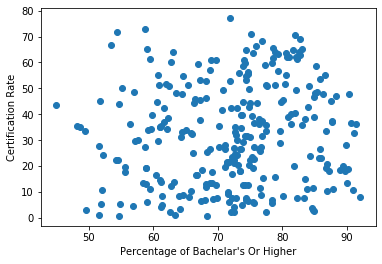

In [53]:
plt.scatter(x='PercentBachelorOrHigher', y='PercentCertifiedAudited',data=df)
plt.xlabel('Percentage of Bachelar\'s Or Higher')
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 8.pdf');

In [54]:
# Pearson's correlation coefficient
np.corrcoef(df['PercentBachelorOrHigher'], df['PercentCertifiedAudited'])

array([[1.        , 0.10142417],
       [0.10142417, 1.        ]])

There is a weak positive correlation

### Learners activity variables

In this part, we explore the relationship between certification and learners activity variables including 'Participants','PercentAudited', 'PercentPlayedVideo', 'PercentPosted', 'PercentGradeGreaterThanZero', 'TotalCourseHours', 'MedianHoursCertification'

#### Participants vs. Certification

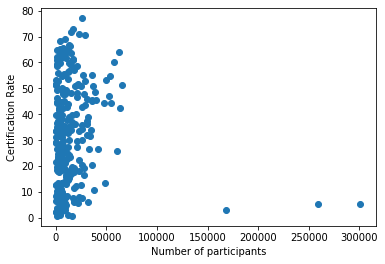

In [55]:
plt.scatter(x='Participants', y='PercentCertifiedAudited',data=df)
plt.xlabel('Number of participants')
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 9.pdf');

In [56]:
# Pearson's correlation coefficient
np.corrcoef(df['Participants'], df['PercentCertifiedAudited'])

array([[ 1.        , -0.03089816],
       [-0.03089816,  1.        ]])

There is no correlation between Number of Participants and Certification rate.

#### Audited vs. Certification

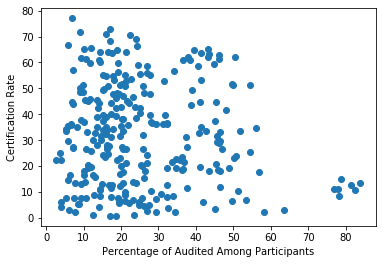

In [57]:
plt.scatter(x='PercentAudited', y='PercentCertifiedAudited',data=df)
plt.xlabel('Percentage of Audited Among Participants')
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 10.pdf');

In [58]:
# Pearson's correlation coefficient
np.corrcoef(df['PercentAudited'], df['PercentCertifiedAudited'])

array([[ 1.        , -0.10309347],
       [-0.10309347,  1.        ]])

There is a weak negative correlation.

#### Played Video vs. Certification

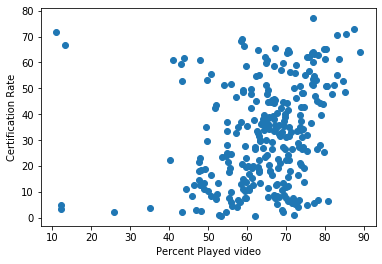

In [59]:
plt.scatter(x='PercentPlayedVideo', y='PercentCertifiedAudited',data=df)
plt.xlabel('Percent Played video')
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 11.pdf');

In [60]:
# Pearson's correlation coefficient
np.corrcoef(df['PercentPlayedVideo'], df['PercentCertifiedAudited'])

array([[1.        , 0.27272419],
       [0.27272419, 1.        ]])

There is a weak positive correlation.

#### Post vs. Certification

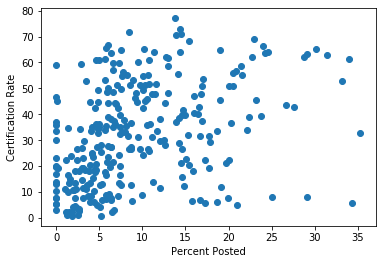

In [61]:
plt.scatter(x='PercentPosted', y='PercentCertifiedAudited',data=df)
plt.xlabel('Percent Posted')
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 12.pdf');

In [62]:
# Pearson's correlation coefficient
np.corrcoef(df['PercentPosted'], df['PercentCertifiedAudited'])

array([[1.        , 0.38255059],
       [0.38255059, 1.        ]])

There is a weak positive correlation.

#### Grade vs. Certification

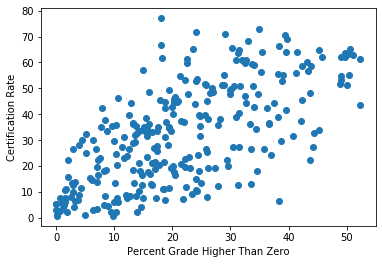

In [63]:
plt.scatter(x='PercentGradeHigherThanZero', y='PercentCertifiedAudited',data=df)
plt.xlabel('Percent Grade Higher Than Zero')
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 13.pdf');

In [64]:
# Pearson's correlation coefficient
np.corrcoef(df['PercentGradeHigherThanZero'], df['PercentCertifiedAudited'])

array([[1.        , 0.66194215],
       [0.66194215, 1.        ]])

There is a strong correlation between grade and certificatio rate.

#### Total Hours vs. Certification

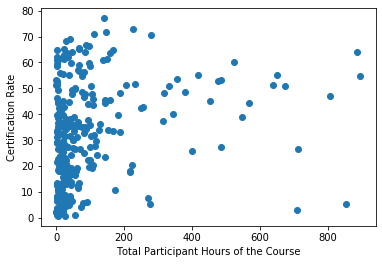

In [65]:
plt.scatter(x='TotalCourseHours', y='PercentCertifiedAudited',data=df)
plt.xlabel('Total Participant Hours of the Course')
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 14.pdf');

In [66]:
# Pearson's correlation coefficient
np.corrcoef(df['TotalCourseHours'], df['PercentCertifiedAudited'])

array([[1.        , 0.22443978],
       [0.22443978, 1.        ]])

There is a weak positive correlation.

#### Median Hours for Certification vs Certification

''

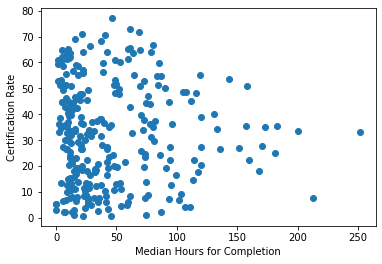

In [67]:
plt.scatter(x='MedianHoursCertification', y='PercentCertifiedAudited',data=df)
plt.xlabel('Median Hours for Completion')
plt.ylabel('Certification Rate')
plt.savefig('figures/Figure 15.pdf')
;

In [68]:
# Pearson's correlation coefficient
np.corrcoef(df['MedianHoursCertification'], df['PercentCertifiedAudited'])

array([[ 1.        , -0.01952236],
       [-0.01952236,  1.        ]])

There is no correlation.

**Summary:**

All variables have somewhat correlation with certification except Participants and MedianHoursCertification. Among the variables correlated to certification rate, PercentGradeHigherThanZero has a relatively strong correlation. 